**AKSHAT PATIDAR | 17EX20002**

In [1]:
#IMPORTING ALL THE LIBRARIRES NEEDED

import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import seaborn as sns
%matplotlib inline
pd.options.mode.chained_assignment = None

In [2]:
data = pd.read_csv('/content/facies_dataset.csv')

**DATA UNDERSTANDING**

In [3]:
data.head(10)

,Facies,Formation,Well Name,Depth,GR,ILD_log10,DeltaPHI,PHIND,PE,NM_M,RELPOS
0,3,A1 SH,SHRIMPLIN,2793.0,77.45,0.664,9.9,11.915,4.6,1,1.000
1,3,A1 SH,SHRIMPLIN,2793.5,78.26,0.661,14.2,12.565,4.1,1,0.979
2,3,A1 SH,SHRIMPLIN,2794.0,79.05,0.658,14.8,13.050,3.6,1,0.957
3,3,A1 SH,SHRIMPLIN,2794.5,86.10,0.655,13.9,13.115,3.5,1,0.936
4,3,A1 SH,SHRIMPLIN,2795.0,74.58,0.647,13.5,13.300,3.4,1,0.915
5,3,A1 SH,SHRIMPLIN,2795.5,73.97,0.636,14.0,13.385,3.6,1,0.894
6,3,A1 SH,SHRIMPLIN,2796.0,73.72,0.630,15.6,13.930,3.7,1,0.872
7,3,A1 SH,SHRIMPLIN,2796.5,75.65,0.625,16.5,13.920,3.5,1,0.830
8,3,A1 SH,SHRIMPLIN,2797.0,73.79,0.624,16.2,13.980,3.4,1,0.809
9,3,A1 SH,SHRIMPLIN,2797.5,76.89,0.615,16.9,14.220,3.5,1,0.787


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4149 entries, 0 to 4148
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Facies     4149 non-null   int64  
 1   Formation  4149 non-null   object 
 2   Well Name  4149 non-null   object 
 3   Depth      4149 non-null   float64
 4   GR         4149 non-null   float64
 5   ILD_log10  4149 non-null   float64
 6   DeltaPHI   4149 non-null   float64
 7   PHIND      4149 non-null   float64
 8   PE         3232 non-null   float64
 9   NM_M       4149 non-null   int64  
 10  RELPOS     4149 non-null   float64
dtypes: float64(7), int64(2), object(2)
memory usage: 356.7+ KB


In [5]:
data['Well Name'] = data['Well Name'].astype('category')
data['Formation'] = data['Formation'].astype('category')

In [6]:
data.describe()

,Facies,Depth,GR,ILD_log10,DeltaPHI,PHIND,PE,NM_M,RELPOS
count,4149.000000,4149.000000,4149.000000,4149.000000,4149.000000,4149.000000,3232.000000,4149.000000,4149.000000
mean,4.503254,2906.867438,64.933985,0.659566,4.402484,13.201066,3.725014,1.518438,0.521852
std,2.474324,133.300164,30.302530,0.252703,5.274947,7.132846,0.896152,0.499720,0.286644
min,1.000000,2573.500000,10.149000,-0.025949,-21.832000,0.550000,0.200000,1.000000,0.000000
25%,2.000000,2821.500000,44.730000,0.498000,1.600000,8.500000,3.100000,1.000000,0.277000
50%,4.000000,2932.500000,64.990000,0.639000,4.300000,12.020000,3.551500,2.000000,0.528000
75%,6.000000,3007.000000,79.438000,0.822000,7.500000,16.050000,4.300000,2.000000,0.769000
max,9.000000,3138.000000,361.150000,1.800000,19.312000,84.400000,8.094000,2.000000,1.000000


***There are 9 features in total*** 

**GR:** Gamma emission from formation.  
**ILD_log10 :** Resistivity measurment for identification of reservoir fluid content.  
**PE :** photoelectric effect log can be used for lithology (mineral contet of rock) identificaiton.  
**DeltaPHI:** Phi is porosity index in petrophysics. To measure porosity, there serval methods such as neutron and density. This is differences between them.  
**PNHIND:** Average of neutron and density log.  
**NM_M :**nonmarine-marine indicator  
**RELPOS:** relative position

**The nine discrete facies (classes of rocks) are:**  
**(SS)** Nonmarine sandstone  
**(CSiS)** Nonmarine coarse siltstone  
**(FSiS)** Nonmarine fine siltstone  
**(SiSH)** Marine siltstone and shale  
**(MS)** Mudstone (limestone)  
**(WS)** Wackestone (limestone)  
**(D)** Dolomite  
**(PS)** Packstone-grainstone (limestone)  
**(BS)** Phylloid-algal bafflestone (limestone)  

**DATA VISUALIZATION**

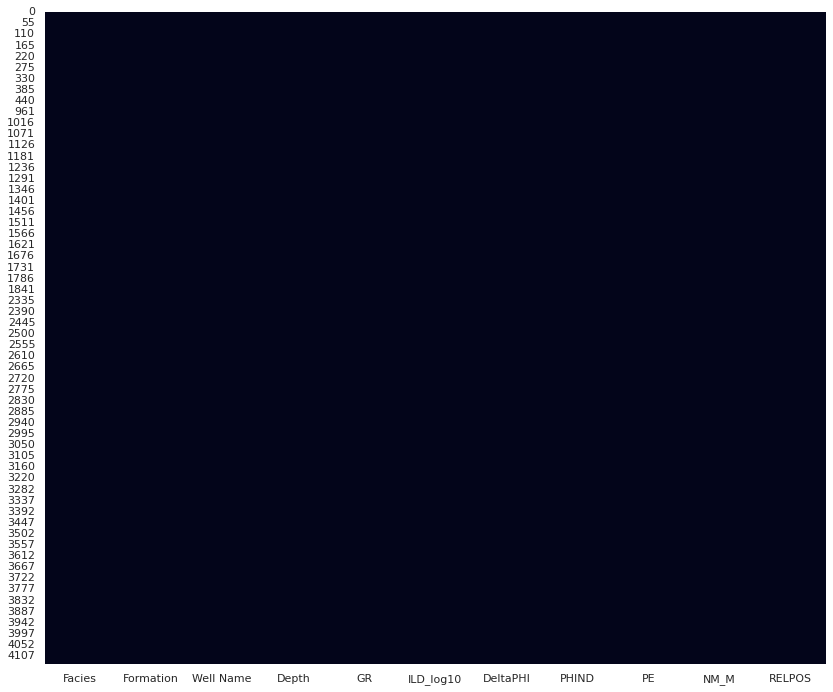

In [12]:
#HEATMAP OF NULL VALUE

sns.heatmap(data.isnull(), cbar=False)

In [8]:
PE_mask = data['PE'].notnull().values
data = data[PE_mask]

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


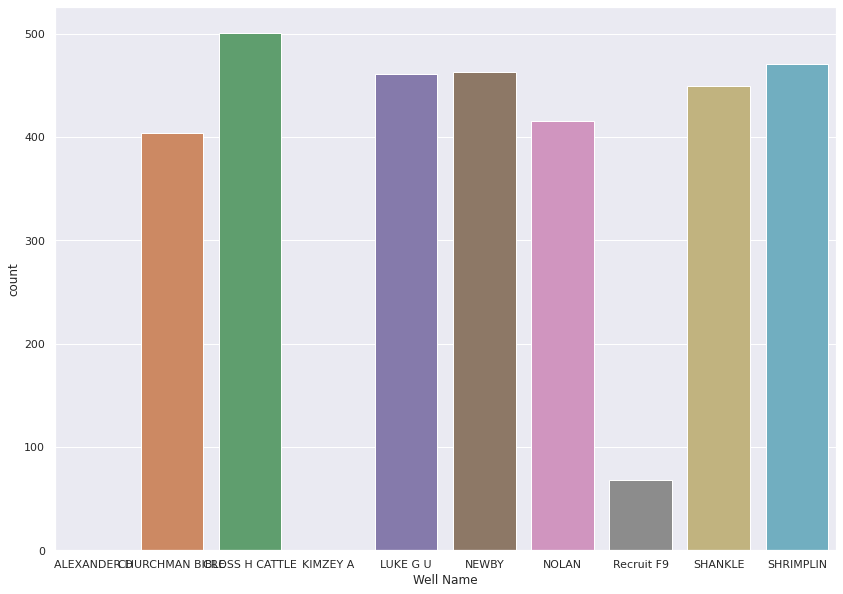

In [11]:
#COUNTPLOT OF WELLS

sns.countplot(data['Well Name'])
sns.set(rc={'figure.figsize':(14,12)})

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


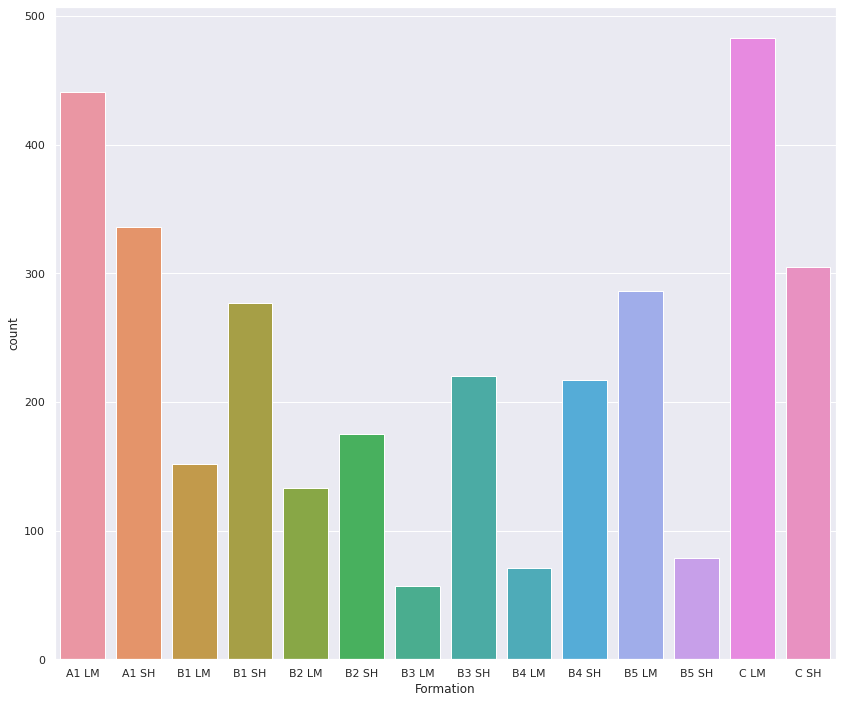

In [10]:
#COUNTPLOT OF FORMATIONS

sns.countplot(data['Formation'])
sns.set(rc={'figure.figsize':(14,10)})

In [13]:
#facies_color_map is a dictionary that maps facies labels to their respective colors

facies_colors = ['#F4D03F', '#F5B041','#DC7633','#6E2C00','#1B4F72','#2E86C1', '#AED6F1', '#A569BD', '#196F3D']

facies_labels = ['SS', 'CSiS', 'FSiS', 'SiSh', 'MS','WS', 'D','PS', 'BS']

facies_color_map = {}
for ind, label in enumerate(facies_labels):
    facies_color_map[label] = facies_colors[ind]

def label_facies(row, labels):
    return labels[ row['Facies'] -1]
    
data.loc[:,'FaciesLabels'] = data.apply(lambda row: label_facies(row, facies_labels), axis=1)

SS      259
CSiS    738
FSiS    615
SiSh    184
MS      217
WS      462
D        98
PS      498
BS      161
Name: Facies, dtype: int64

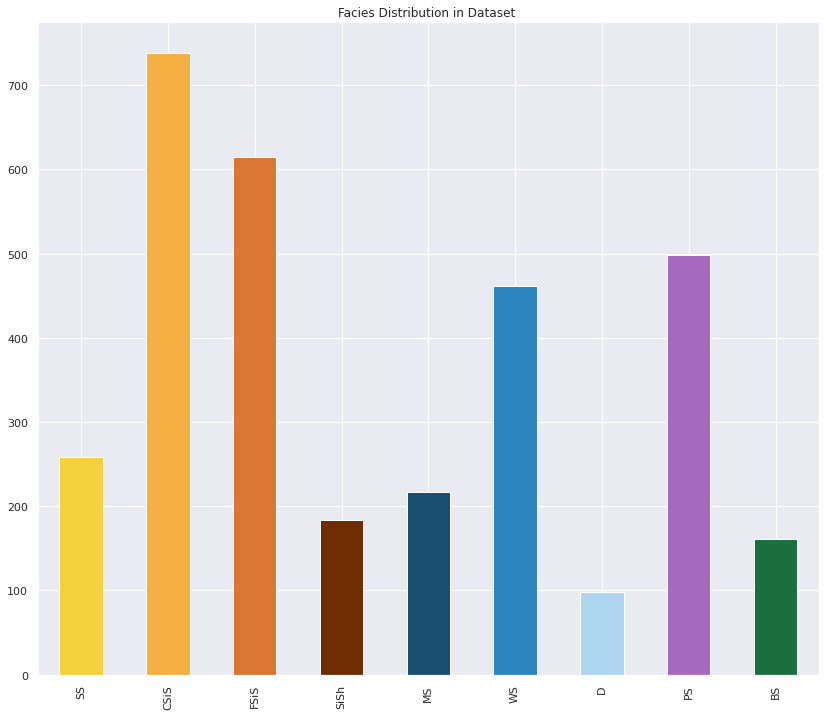

In [14]:
#COUNTPLOT OF FACIES

facies_counts = data['Facies'].value_counts().sort_index()
facies_counts.index = facies_labels
facies_counts.plot(kind='bar',color=facies_colors,title='Facies Distribution in Dataset ')
facies_counts

In [15]:
#SEPARATING OUT 'NOLAN' WELL FOR CHECCKING ACCURACY OF OUR MODEL WORK

df = data[data['Well Name'] == 'NOLAN']
data = data[data['Well Name'] != 'NOLAN']

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2817 entries, 0 to 4148
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   Facies        2817 non-null   int64   
 1   Formation     2817 non-null   category
 2   Well Name     2817 non-null   category
 3   Depth         2817 non-null   float64 
 4   GR            2817 non-null   float64 
 5   ILD_log10     2817 non-null   float64 
 6   DeltaPHI      2817 non-null   float64 
 7   PHIND         2817 non-null   float64 
 8   PE            2817 non-null   float64 
 9   NM_M          2817 non-null   int64   
 10  RELPOS        2817 non-null   float64 
 11  FaciesLabels  2817 non-null   object  
dtypes: category(2), float64(7), int64(2), object(1)
memory usage: 248.6+ KB


In [17]:
from mpl_toolkits.axes_grid1 import make_axes_locatable

**LOG CURVES AND FACIES FOR TWO DIFFERENT WELL**

In [18]:
#PLOTTING LOGS CURVE OF DIFFERENT COLOUT WITH FACIES

def make_facies_log_plot(logs, facies_colors):
    logs = logs.sort_values(by='Depth')
    cmap_facies = colors.ListedColormap(
            facies_colors[0:len(facies_colors)], 'indexed')
    
    ztop=logs.Depth.min(); zbot=logs.Depth.max()
    
    cluster=np.repeat(np.expand_dims(logs['Facies'].values,1), 100, 1)
    
    f, ax = plt.subplots(nrows=1, ncols=6, figsize=(12, 6))
    ax[0].plot(logs.GR, logs.Depth, '-g')
    ax[1].plot(logs.ILD_log10, logs.Depth, '-')
    ax[2].plot(logs.DeltaPHI, logs.Depth, '-', color='0.40')
    ax[3].plot(logs.PHIND, logs.Depth, '-', color='r')
    ax[4].plot(logs.PE, logs.Depth, '-', color='black')
    im=ax[5].imshow(cluster, interpolation='none', aspect='auto',
                    cmap=cmap_facies,vmin=1,vmax=9)
    
    divider = make_axes_locatable(ax[5])
    cax = divider.append_axes("right", size="20%", pad=0.05)
    cbar=plt.colorbar(im, cax=cax)
    cbar.set_label((5*' ').join([' SS ', 'CSiS', 'FSiS', 
                                'SiSh', ' MS ', ' WS ', ' D  ', 
                                ' PS ', ' BS ']))
    cbar.set_ticks(range(0,1)); cbar.set_ticklabels('')
    
    for i in range(len(ax)-1):
        ax[i].set_ylim(ztop,zbot)
        ax[i].invert_yaxis()
        ax[i].grid()
        ax[i].locator_params(axis='x', nbins=3)
    
    ax[0].set_xlabel("GR")
    ax[0].set_xlim(logs.GR.min(),logs.GR.max())
    ax[1].set_xlabel("ILD_log10")
    ax[1].set_xlim(logs.ILD_log10.min(),logs.ILD_log10.max())
    ax[2].set_xlabel("DeltaPHI")
    ax[2].set_xlim(logs.DeltaPHI.min(),logs.DeltaPHI.max())
    ax[3].set_xlabel("PHIND")
    ax[3].set_xlim(logs.PHIND.min(),logs.PHIND.max())
    ax[4].set_xlabel("PE")
    ax[4].set_xlim(logs.PE.min(),logs.PE.max())
    ax[5].set_xlabel('Facies')
    
    ax[1].set_yticklabels([]); ax[2].set_yticklabels([]); ax[3].set_yticklabels([])
    ax[4].set_yticklabels([]); ax[5].set_yticklabels([])
    ax[5].set_xticklabels([])
    f.suptitle('Well: %s'%logs.iloc[0]['Well Name'], fontsize=14,y=0.94)

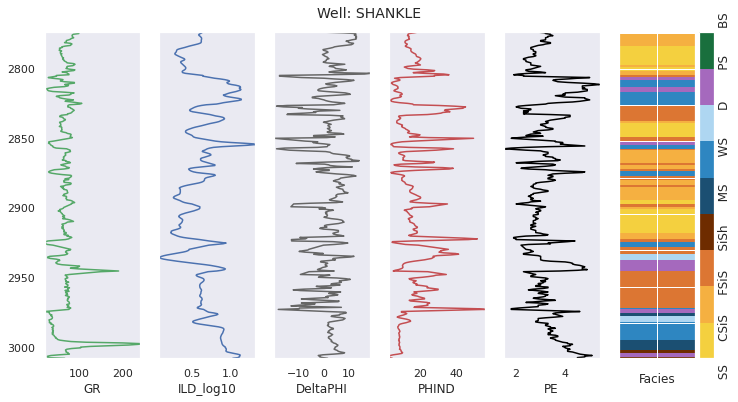

In [55]:
make_facies_log_plot(data[data['Well Name'] == 'SHANKLE'],facies_colors)
plt.grid()
plt.show()

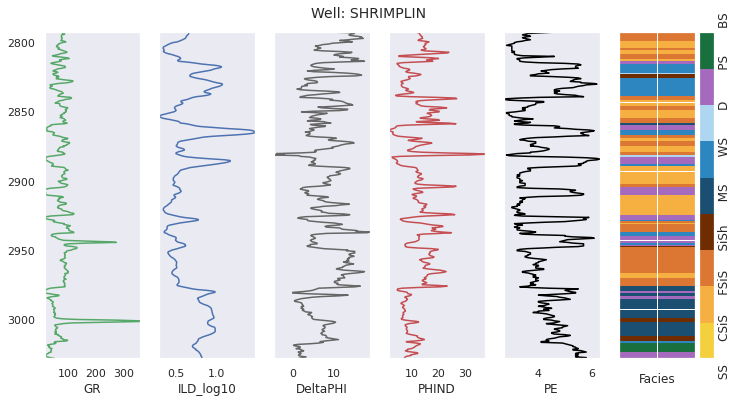

In [20]:
make_facies_log_plot(
    data[data['Well Name'] == 'SHRIMPLIN'],facies_colors)

**PAIRPLOT BETWEEN FEATURES**

/usr/lib/python3.7/_collections_abc.py:841: MatplotlibDeprecationWarning: 
The datapath rcparam was deprecated in Matplotlib 3.2.1 and will be removed two minor releases later.
  self[key] = other[key]
/usr/lib/python3.7/_collections_abc.py:841: MatplotlibDeprecationWarning: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
  self[key] = other[key]
/usr/lib/python3.7/_collections_abc.py:841: MatplotlibDeprecationWarning: 
The text.latex.unicode rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2.
  self[key] = other[key]
/usr/lib/python3.7/_collections_abc.py:841: MatplotlibDeprecationWarning: 
The verbose.fileo rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
  self[key] = other[key]
/usr/lib/python3.7/_collections_abc.py:841: MatplotlibDeprecationWarning: 
The verbose.level rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
  self[key] = other[key]


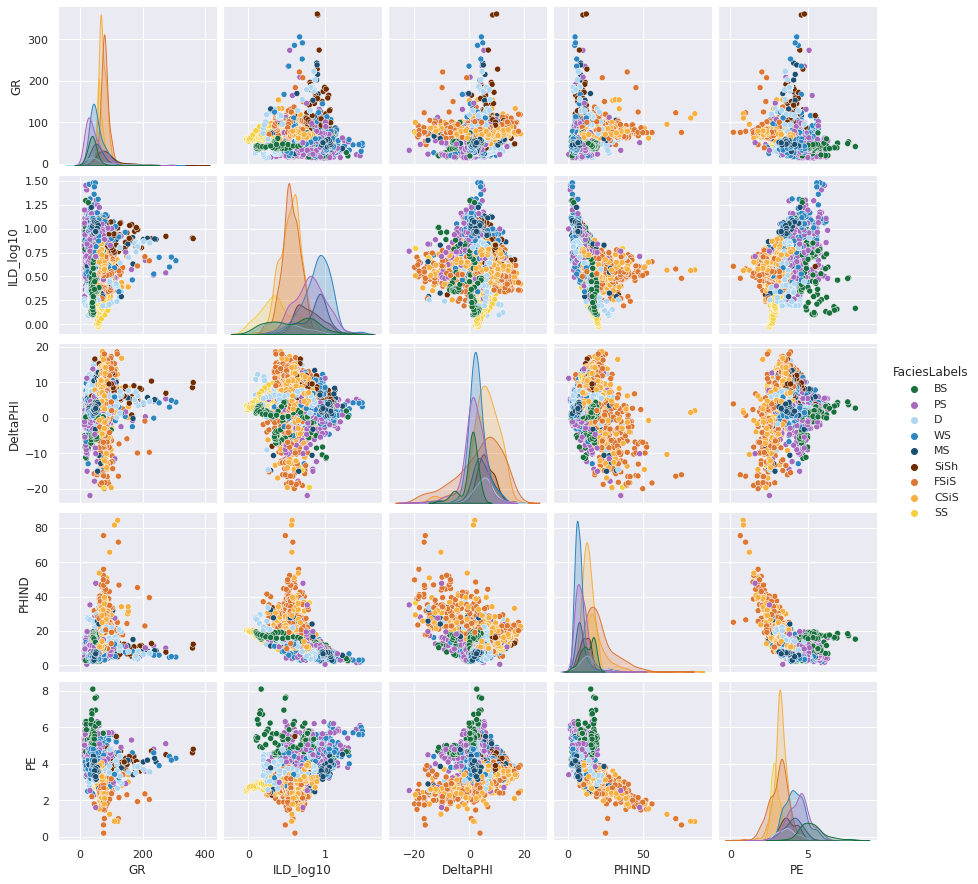

In [21]:
inline_rc = dict(mpl.rcParams)
sns.set()
sns.pairplot(data.drop(['Well Name','Facies','Formation','Depth','NM_M','RELPOS'],axis=1),
             hue='FaciesLabels', palette=facies_color_map,hue_order=list(reversed(facies_labels)))
mpl.rcParams.update(inline_rc)

**CORRELATION BETWEEN FEATURES**

In [22]:
data.corr()

,Facies,Depth,GR,ILD_log10,DeltaPHI,PHIND,PE,NM_M,RELPOS
Facies,1.000000,0.363199,-0.335827,0.434966,-0.221680,-0.360088,0.699465,0.860088,0.065094
Depth,0.363199,1.000000,-0.085619,0.207171,-0.087318,-0.059062,0.285313,0.313186,-0.015109
GR,-0.335827,-0.085619,1.000000,-0.147170,0.182982,0.247347,-0.299145,-0.268035,-0.186145
ILD_log10,0.434966,0.207171,-0.147170,1.000000,-0.109111,-0.520112,0.429270,0.547478,0.093388
DeltaPHI,-0.221680,-0.087318,0.182982,-0.109111,1.000000,-0.284355,0.047548,-0.151405,0.042295
PHIND,-0.360088,-0.059062,0.247347,-0.520112,-0.284355,1.000000,-0.589487,-0.487452,-0.030956
PE,0.699465,0.285313,-0.299145,0.429270,0.047548,-0.589487,1.000000,0.648681,0.017317
NM_M,0.860088,0.313186,-0.268035,0.547478,-0.151405,-0.487452,0.648681,1.000000,0.025896
RELPOS,0.065094,-0.015109,-0.186145,0.093388,0.042295,-0.030956,0.017317,0.025896,1.000000


**HEATMAP REPRESENTATION OF CORRELATION BETWEEN FEATURES**

(0.0, 9.0)

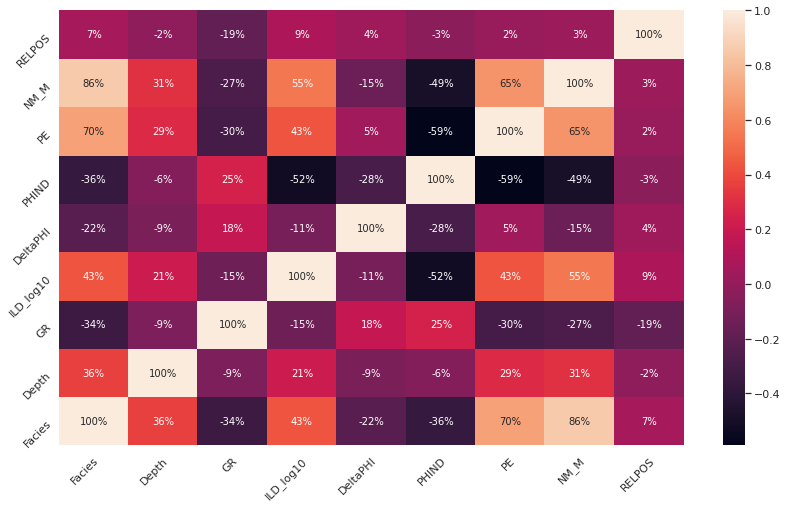

In [23]:
# Visualize data
%matplotlib inline
plt.figure(figsize=(14,8))

ax = sns.heatmap(data.corr(), annot=True, fmt ='.0%')
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",rotation_mode="anchor")
plt.setp(ax.get_yticklabels(), rotation=45, ha="right",rotation_mode="anchor")
ax.set_ylim(len(data)-2817,9)

In [24]:
correct_facies_labels = data['Facies'].values
feature_vectors = data.drop(['Formation', 'Well Name', 'Depth','Facies','FaciesLabels'], axis=1)

In [25]:
from sklearn import preprocessing

scaler = preprocessing.StandardScaler().fit(feature_vectors)
scaled_features = scaler.transform(feature_vectors)

In [26]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
        scaled_features, correct_facies_labels, test_size=0.2, random_state=10)

In [27]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

**SUPPORT VECTOR CLASSIFIER MODEL**


In [28]:
from sklearn import svm
SVM_model = svm.SVC(C=10, gamma=1)

In [29]:
SVM_model.fit(X_train,y_train)

SVC(C=10, gamma=1)

In [30]:
yhat_SVM = SVM_model.predict(X_test)

In [31]:
from sklearn.metrics import confusion_matrix
conf_SVM = confusion_matrix(y_test, yhat_SVM)

In [32]:
from sklearn.metrics import jaccard_score
from sklearn.metrics import f1_score

jSVM = jaccard_score(y_test, yhat_SVM,average ='weighted')
f1SVM = f1_score(y_test, yhat_SVM, average='weighted')
print("SVM Jaccard index: %.3f" % jSVM )
print("SVM F1-score: %.3f" % f1SVM  )

SVM Jaccard index: 0.598
SVM F1-score: 0.746


**CONFUSION MATRIX FOR SVM MODEL**

<Figure size 864x864 with 0 Axes>

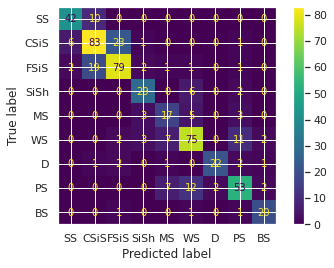

In [34]:
conf_SVM = confusion_matrix(y_test, yhat_SVM)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_SVM, display_labels = facies_labels)
plt.figure(figsize=(12,12))
disp.plot()
plt.show()

**RANDOM CLASSIFIER MODEL**

In [35]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

RFC_model = RandomForestClassifier(max_depth=12, n_estimators=20, max_features=6).fit(X_train, y_train)


yhat_RFC = RFC_model.predict(X_test)

jRFC  = jaccard_score(y_test, yhat_RFC, average='weighted')
f1RFC = f1_score(y_test, yhat_RFC, average='weighted')

print("RFC Jaccard index: %.3f" % jRFC )
print("RFC F1-score: %.3f" % f1RFC)

conf_RFC = confusion_matrix(y_test, yhat_RFC)

RFC Jaccard index: 0.547
RFC F1-score: 0.703


**CONFUSION MATRIX FOR RFC MODEL**

<Figure size 576x576 with 0 Axes>

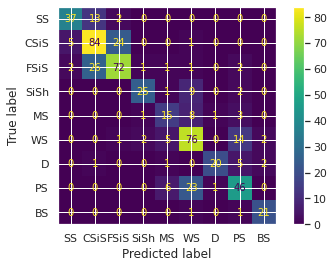

In [37]:
conf_RFC = confusion_matrix(y_test, yhat_RFC)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_RFC, display_labels = facies_labels)
plt.figure(figsize=(8,8))
disp.plot()
plt.show()

**LOGISTIC RESGRESSION CLASSIFIER**

In [38]:
from sklearn.linear_model import LogisticRegression
LR_model = LogisticRegression(C=1).fit(X_train,y_train)
# LR_model

yhat_LR = LR_model.predict(X_test)

jLR  = jaccard_score(y_test, yhat_LR,average ='weighted')
f1LR = f1_score(y_test, yhat_LR, average='weighted')
print("LR Jaccard index: %.3f" % jLR )
print("LR F1-score: %.3f" % f1LR )

conf_LR = confusion_matrix(y_test, yhat_LR)

LR Jaccard index: 0.416
LR F1-score: 0.577


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


**NEURAL NETWORK CLASSIFIER**

In [42]:
from sklearn.neural_network import MLPClassifier


NNC_model = MLPClassifier(alpha=0.001, max_iter=1000, learning_rate_init=0.001, 
                          solver='adam', batch_size=10, hidden_layer_sizes=250 ).fit(X_train, y_train)

yhat_NNC = NNC_model.predict(X_test)
jNNC  =  jaccard_score(y_test, yhat_NNC,average ='macro')
f1NNC =  f1_score(y_test, yhat_NNC, average='macro')

print("NNC Jaccard index: %.3f" %jNNC)
print("NNC F1-score: %.3f" %f1NNC )

conf_NNC = confusion_matrix(y_test, yhat_NNC)
# display_cm(conf_NNC, facies_labels, hide_zeros=True, display_metrics=True)

NNC Jaccard index: 0.546
NNC F1-score: 0.701


**EVALUATION DATAFRAME OF MODELS**

In [40]:
data_frame1 ={'Model type': ['SVM', 'RFC', 'NNC','LR'],
       'Jaccard index': [jSVM, jRFC, jNNC,jLR],
       'F1-Score': [f1SVM, f1RFC, f1NNC, f1LR]
            }
df1 = pd.DataFrame(data_frame1, columns = ['Model type','Jaccard index','F1-Score' ] )
df1.round(2)

,Model type,Jaccard index,F1-Score
0,SVM,0.60,0.75
1,RFC,0.55,0.70
2,NNC,0.55,0.71
3,LR,0.42,0.58


In [43]:
y_blind = df['Facies'].values

In [44]:
blind_features = df.drop(['Formation', 'Well Name', 'Depth','Facies','FaciesLabels'], axis=1)

In [45]:
X_blind = scaler.transform(blind_features)

**BLIND WELL FACIES PREDICTION**

In [46]:
yhat_blind_SVM = SVM_model.predict(X_blind)
df['SVM_Pred'] = yhat_blind_SVM

yhat_blind_RFC = RFC_model.predict(X_blind)
df['RFC_Pred'] = yhat_blind_RFC

yhat_blind_NNC = NNC_model.predict(X_blind)
df['NNC_Pred'] = yhat_blind_NNC

yhat_blind_LR = LR_model.predict(X_blind)
df['LR_Pred'] = yhat_blind_LR

In [48]:
jSVM_b =  jaccard_score(y_blind, yhat_blind_SVM,average='weighted')
f1SVM_b = f1_score(y_blind, yhat_blind_SVM, average='weighted')

jRFC_b =jaccard_score(y_blind, yhat_blind_RFC,average='weighted')
f1RFC_b=f1_score(y_blind, yhat_blind_RFC, average='weighted')

jNNC_b  =jaccard_score(y_blind, yhat_blind_NNC,average='weighted')
f1NNC_b =f1_score(y_blind, yhat_blind_NNC, average='weighted')

jLR_b  = jaccard_score(y_blind, yhat_blind_LR,average='weighted')
f1LR_b = f1_score(y_blind, yhat_blind_LR, average='weighted')

**DATAFRAME OF MODEL EVALUATION FOR BLIND WELL PERFORMANCE**

In [49]:
data_frame2 ={'Model type': ['SVM', 'RFC', 'NNC', 'LR'],
       'Jaccard index': [jSVM_b, jRFC_b, jNNC_b, jLR_b],
       'F1-Score': [f1SVM_b, f1RFC_b, f1NNC_b, f1LR_b]
            }
df2 = pd.DataFrame(data_frame2, columns = ['Model type','Jaccard index','F1-Score' ] )
df2.round(2)

,Model type,Jaccard index,F1-Score
0,SVM,0.34,0.49
1,RFC,0.36,0.50
2,NNC,0.40,0.54
3,LR,0.35,0.48


In [50]:
def compare_facies_plot(logs, compadre, facies_colors):
    #make sure logs are sorted by depth
    logs = logs.sort_values(by='Depth')
    cmap_facies = colors.ListedColormap(
            facies_colors[0:len(facies_colors)], 'indexed')
    
    ztop=logs.Depth.min(); zbot=logs.Depth.max()
    
    cluster1 = np.repeat(np.expand_dims(logs['Facies'].values,1), 100, 1)
    cluster2 = np.repeat(np.expand_dims(logs[compadre].values,1), 100, 1)
    
    f, ax = plt.subplots(nrows=1, ncols=7, figsize=(12, 6))
    ax[0].plot(logs.GR, logs.Depth, '-g')
    ax[1].plot(logs.ILD_log10, logs.Depth, '-')
    ax[2].plot(logs.DeltaPHI, logs.Depth, '-', color='0.5')
    ax[3].plot(logs.PHIND, logs.Depth, '-', color='r')
    ax[4].plot(logs.PE, logs.Depth, '-', color='black')
    im1 = ax[5].imshow(cluster1, interpolation='none', aspect='auto',
                    cmap=cmap_facies,vmin=1,vmax=9)
    im2 = ax[6].imshow(cluster2, interpolation='none', aspect='auto',
                    cmap=cmap_facies,vmin=1,vmax=9)
    
    divider = make_axes_locatable(ax[6])
    cax = divider.append_axes("right", size="20%", pad=0.05)
    cbar=plt.colorbar(im2, cax=cax)
    cbar.set_label((5*' ').join([' SS ', 'CSiS', 'FSiS', 
                                'SiSh', ' MS ', ' WS ', ' D  ', 
                                ' PS ', ' BS ']))
    cbar.set_ticks(range(0,1)); cbar.set_ticklabels('')
    
    for i in range(len(ax)-2):
        ax[i].set_ylim(ztop,zbot)
        ax[i].invert_yaxis()
        ax[i].grid()
        ax[i].locator_params(axis='x', nbins=3)
    
    ax[0].set_xlabel("GR")
    ax[0].set_xlim(logs.GR.min(),logs.GR.max())
    ax[1].set_xlabel("ILD_log10")
    ax[1].set_xlim(logs.ILD_log10.min(),logs.ILD_log10.max())
    ax[2].set_xlabel("DeltaPHI")
    ax[2].set_xlim(logs.DeltaPHI.min(),logs.DeltaPHI.max())
    ax[3].set_xlabel("PHIND")
    ax[3].set_xlim(logs.PHIND.min(),logs.PHIND.max())
    ax[4].set_xlabel("PE")
    ax[4].set_xlim(logs.PE.min(),logs.PE.max())
    ax[5].set_xlabel('Facies')
    ax[6].set_xlabel(compadre)
    
    ax[1].set_yticklabels([]); ax[2].set_yticklabels([]); ax[3].set_yticklabels([])
    ax[4].set_yticklabels([]); ax[5].set_yticklabels([]); ax[6].set_yticklabels([])
    ax[5].set_xticklabels([])
    ax[6].set_xticklabels([])
    f.suptitle('Well: %s'%logs.iloc[0]['Well Name'], fontsize=14,y=0.94)

**ACTUAL FACIES AND NNC PREDICTED FACIES COMPARISON**

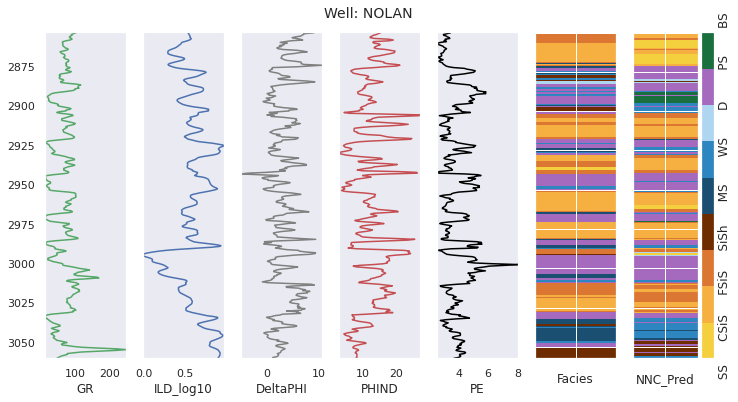

In [54]:
compare_facies_plot(df, 'NNC_Pred', facies_colors)